In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
bitcoin_df = pd.read_csv("Input_data/coin_Bitcoin.csv")
bitcoin_df = bitcoin_df[["Date", "Close"]]
bitcoin_df.rename({"Close": 'bitcoin'}, axis=1, inplace=True)
bitcoin_df["Date"] = bitcoin_df["Date"].str[:10]


In [3]:
dogecoin_df = pd.read_csv("Input_data/coin_Dogecoin.csv")
dogecoin_df = dogecoin_df[["Date", "Close"]]
dogecoin_df.rename({"Close": 'dogecoin'}, axis=1, inplace=True)
dogecoin_df["Date"] = dogecoin_df["Date"].str[:10]


In [4]:
ethereum_df = pd.read_csv("Input_data/coin_Ethereum.csv")
ethereum_df = ethereum_df[["Date", "Close"]]
ethereum_df.rename({"Close": 'ethereum'}, axis=1, inplace=True)
ethereum_df["Date"] = ethereum_df["Date"].str[:10]


In [5]:
crudeoil_df = pd.read_csv("Input_data/crudeoil.csv")
crudeoil_df = crudeoil_df[["Date", "Close"]]
crudeoil_df.rename({"Close": 'crudeoil'}, axis=1, inplace=True)


In [6]:
ngas_df = pd.read_csv("Input_data/daily_csv.csv")
ngas_df.rename({"Price": 'ngas'}, axis=1, inplace=True)


In [7]:
index_df = pd.read_csv("Input_data/indexData.csv")
    
index_df = index_df[(index_df["Date"] >= "2000-01-01")] 

nysecomp_df = index_df[(index_df["Index"] == "NYA")]
nasdaqcomp_df = index_df[(index_df["Index"] == "IXIC")]
hangsengind_df = index_df[(index_df["Index"] == "HSI")]
shanghaicomp_df = index_df[(index_df["Index"] == "000001.SS")]
euronext_df = index_df[(index_df["Index"] == "N100")]
nikkei_df = index_df[(index_df["Index"] == "N225")]

In [8]:
nysecomp_df = nysecomp_df[["Date", "Close"]]
nysecomp_df.rename({"Close": 'nysecomp'}, axis=1, inplace=True)
nasdaqcomp_df = nasdaqcomp_df[["Date", "Close"]]
nasdaqcomp_df.rename({"Close": 'nasdaqcomp'}, axis=1, inplace=True)
hangsengind_df = hangsengind_df[["Date", "Close"]]
hangsengind_df.rename({"Close": 'hangsengind'}, axis=1, inplace=True)
shanghaicomp_df = shanghaicomp_df[["Date", "Close"]]
shanghaicomp_df.rename({"Close": 'shanghaicomp'}, axis=1, inplace=True)
euronext_df = euronext_df[["Date", "Close"]]
euronext_df.rename({"Close": 'euronext'}, axis=1, inplace=True)
nikkei_df = nikkei_df[["Date", "Close"]]
nikkei_df.rename({"Close": 'nikkei'}, axis=1, inplace=True)

In [22]:
index_multi_df = pd.merge(nysecomp_df, nasdaqcomp_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, hangsengind_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, shanghaicomp_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, euronext_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, nikkei_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, bitcoin_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, dogecoin_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, ethereum_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, crudeoil_df, on="Date", how="inner",)
index_multi_df = pd.merge(index_multi_df, ngas_df, on="Date", how="inner",)
index_multi_df = index_multi_df.dropna(axis=0, how='any')
index_multi_df

,Date,nysecomp,nasdaqcomp,hangsengind,shanghaicomp,euronext,nikkei,bitcoin,dogecoin,ethereum,crudeoil,ngas
0,2015-08-10,10906.04981,5101.799805,24521.11914,3928.415039,1005.130005,20808.68945,264.470001,0.000160,0.708448,44.959999,2.85
1,2015-08-11,10802.08984,5036.790039,24498.21094,3927.907959,989.320007,20720.75000,270.385986,0.000164,1.067860,43.080002,2.84
2,2015-08-12,10779.45996,5044.390137,23916.01953,3886.320068,957.309998,20392.76953,266.376007,0.000160,1.217440,43.299999,2.93
3,2015-08-13,10745.30957,5033.560059,24018.80078,3954.555908,966.400024,20595.55078,264.079987,0.000156,1.827670,42.230000,2.93
4,2015-08-14,10782.24023,5048.240234,23991.02930,3965.334961,960.299988,20519.44922,265.679993,0.000158,1.827870,42.500000,2.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2020-07-15,12391.32031,10550.490230,25481.58008,3361.303955,1013.359985,22945.50000,9192.837368,0.003085,238.423527,41.000000,1.76
1083,2020-07-16,12350.11035,10473.830080,24970.68945,3210.099121,1008.599976,22770.35938,9132.227863,0.002995,233.640883,40.759998,1.79
1084,2020-07-17,12402.74023,10503.190430,25089.16992,3214.128906,1006.219971,22696.41992,9151.392240,0.003061,232.773086,40.570000,1.79
1085,2020-07-20,12392.98047,10767.089840,25057.99023,3314.148926,1012.809998,22717.48047,9164.231365,0.003239,236.153168,40.650002,1.71


In [23]:
index_multi_df.to_csv('output/comdined.csv', index=False)

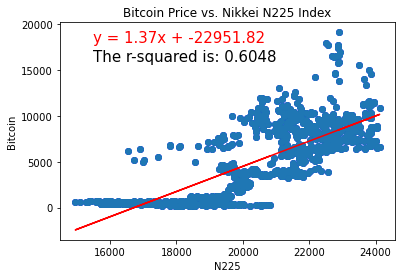

In [26]:
x_values = index_multi_df["nikkei"].values
y_values = index_multi_df["bitcoin"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Bitcoin Price vs. Nikkei N225 Index")
plt.ylabel("Bitcoin")
plt.xlabel("N225")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15500,18000),fontsize=15,color="red")
plt.annotate(rsquared,(15500,16000),fontsize=15,color="black")
plt.savefig('images/bitcoinnikkei.png')

plt.show()


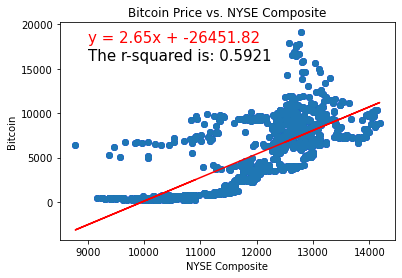

In [28]:
x_values = index_multi_df["nysecomp"].values
y_values = index_multi_df["bitcoin"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Bitcoin Price vs. NYSE Composite")
plt.ylabel("Bitcoin")
plt.xlabel("NYSE Composite")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9000,18000),fontsize=15,color="red")
plt.annotate(rsquared,(9000,16000),fontsize=15,color="black")
plt.savefig('images/bitcoinnyse.png')

plt.show()

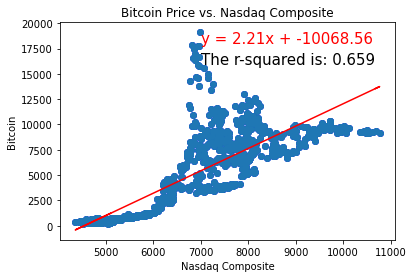

In [36]:
x_values = index_multi_df["nasdaqcomp"].values
y_values = index_multi_df["bitcoin"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Bitcoin Price vs. Nasdaq Composite")
plt.ylabel("Bitcoin")
plt.xlabel("Nasdaq Composite")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7000,18000),fontsize=15,color="red")
plt.annotate(rsquared,(7000,16000),fontsize=15,color="black")
plt.savefig('images/bitcoinnasdaq.png')

plt.show()

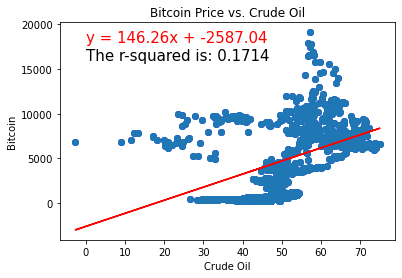

In [37]:
x_values = index_multi_df["crudeoil"].values
y_values = index_multi_df["bitcoin"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Bitcoin Price vs. Crude Oil")
plt.ylabel("Bitcoin")
plt.xlabel("Crude Oil")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,18000),fontsize=15,color="red")
plt.annotate(rsquared,(0,16000),fontsize=15,color="black")
plt.savefig('images/bitcoincrude.png')

plt.show()

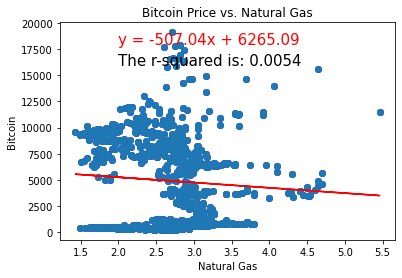

In [38]:
x_values = index_multi_df["ngas"].values
y_values = index_multi_df["bitcoin"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Bitcoin Price vs. Natural Gas")
plt.ylabel("Bitcoin")
plt.xlabel("Natural Gas")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,18000),fontsize=15,color="red")
plt.annotate(rsquared,(2,16000),fontsize=15,color="black")
plt.savefig('images/bitcoinngas.png')

plt.show()

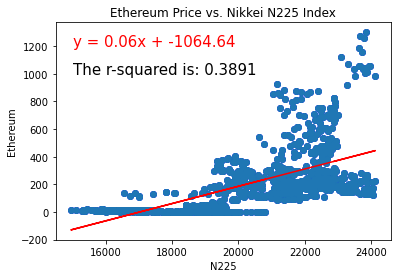

In [44]:
x_values = index_multi_df["nikkei"].values
y_values = index_multi_df["ethereum"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Ethereum Price vs. Nikkei N225 Index")
plt.ylabel("Ethereum")
plt.xlabel("N225")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,1200),fontsize=15,color="red")
plt.annotate(rsquared,(15000,1000),fontsize=15,color="black")
plt.savefig('images/ethereumnikkei.png')

plt.show()


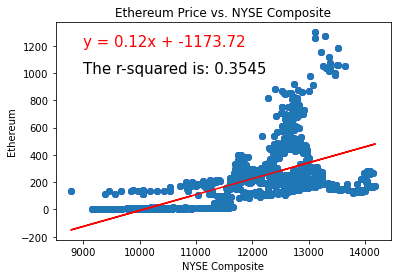

In [45]:
x_values = index_multi_df["nysecomp"].values
y_values = index_multi_df["ethereum"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Ethereum Price vs. NYSE Composite")
plt.ylabel("Ethereum")
plt.xlabel("NYSE Composite")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(9000,1200),fontsize=15,color="red")
plt.annotate(rsquared,(9000,1000),fontsize=15,color="black")
plt.savefig('images/ethereumnyse.png')

plt.show()

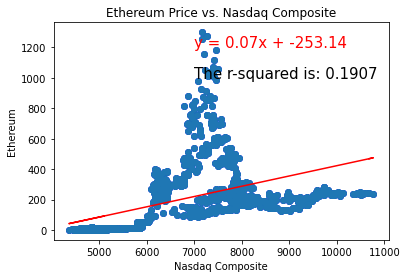

In [46]:
x_values = index_multi_df["nasdaqcomp"].values
y_values = index_multi_df["ethereum"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Ethereum Price vs. Nasdaq Composite")
plt.ylabel("Ethereum")
plt.xlabel("Nasdaq Composite")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7000,1200),fontsize=15,color="red")
plt.annotate(rsquared,(7000,1000),fontsize=15,color="black")
plt.savefig('images/ethereumnasdaq.png')

plt.show()

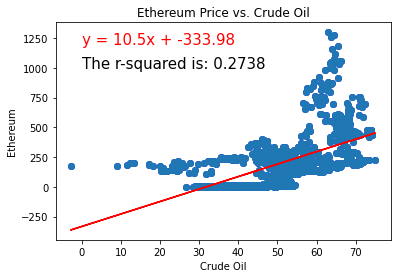

In [47]:
x_values = index_multi_df["crudeoil"].values
y_values = index_multi_df["ethereum"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Ethereum Price vs. Crude Oil")
plt.ylabel("Ethereum")
plt.xlabel("Crude Oil")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,1200),fontsize=15,color="red")
plt.annotate(rsquared,(0,1000),fontsize=15,color="black")
plt.savefig('images/ethereumcrude.png')

plt.show()

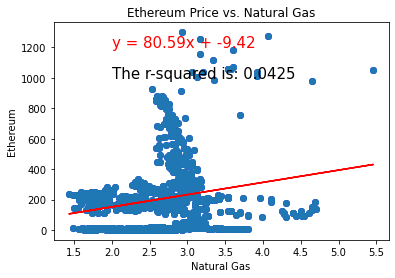

In [48]:
x_values = index_multi_df["ngas"].values
y_values = index_multi_df["ethereum"].values


plt.scatter(x_values, y_values,color="blue")
plt.title("Ethereum Price vs. Natural Gas")
plt.ylabel("Ethereum")
plt.xlabel("Natural Gas")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

rsquared = f"The r-squared is: {round(rvalue**2,4)}"

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,1200),fontsize=15,color="red")
plt.annotate(rsquared,(2,1000),fontsize=15,color="black")
plt.savefig('images/ethereumngas.png')

plt.show()